<a href="https://colab.research.google.com/github/ys2064/NLP_based_AudioSummarizer/blob/main/DataPreprocessing/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Sentence Tokenization

In [15]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
dataset = '/content/drive/MyDrive/NLP project/entire_dataset/'
sentence_tokenized_folder = '/content/drive/MyDrive/NLP project/sentence_tokenized/'
os.makedirs(sentence_tokenized_folder, exist_ok=True)
for filename in os.listdir(dataset):
    if filename.endswith('.txt'):
        with open(os.path.join(dataset, filename), 'r') as file:
            content = file.read()
            sentences = sent_tokenize(content)
            tokenized_content = '\n'.join(sentences)
        output_filename = f'tokenized_{filename}'
        with open(os.path.join(sentence_tokenized_folder, output_filename), 'w') as output_file:
            output_file.write(tokenized_content)
print(f'Tokenized files saved in: {sentence_tokenized_folder}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenized files saved in: /content/drive/MyDrive/NLP project/sentence_tokenized/


# Word Tokenization

In [17]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
dataset = '/content/drive/MyDrive/NLP project/entire_dataset/'
word_tokenization = '/content/drive/MyDrive/NLP project/word_tokenization/'
os.makedirs(word_tokenization, exist_ok=True)
for filename in os.listdir(dataset):
    if filename.endswith('.txt'):
        with open(os.path.join(dataset, filename), 'r') as file:
            content = file.read()
            sentences = sent_tokenize(content)
            tokenized_sentences = []
            for sentence in sentences:
                words = word_tokenize(sentence)
                tokenized_sentences.append(words)
            flattened_words = [word for sentence in tokenized_sentences for word in sentence]
            tokenized_content = str(flattened_words)
            output_filename = f'word_tokenized_{filename}'
            with open(os.path.join(word_tokenization, output_filename), 'w') as output_file:
                output_file.write(tokenized_content)
print(f'Word-tokenized files saved in: {word_tokenization}')


Word-tokenized files saved in: /content/drive/MyDrive/NLP project/word_tokenization/


# Removing stopwords

In [33]:
import os
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))
file_path = '/content/drive/MyDrive/NLP project/word_tokenization/'
removed_stopwords = '/content/drive/MyDrive/NLP project/stopwords_removed/'
os.makedirs(removed_stopwords, exist_ok=True)

def removing_the_stopwords(tokens):
    return [word.lower() for word in tokens if word.lower() not in english_stops]

for filename in os.listdir(file_path):
    if filename.endswith('.txt'):
        input_file_path = os.path.join(file_path, filename)
        with open(input_file_path, 'r') as f:
            tokens = eval(f.read())
            filtered_tokens = removing_the_stopwords(tokens)

        output_filename = f'stopwords_removed_{filename}'
        output_file_path = os.path.join(removed_stopwords, output_filename)
        with open(output_file_path, 'w') as f:
            f.write(str(filtered_tokens))
print(f'Stopword-removed files saved in: {removed_stopwords}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopword-removed files saved in: /content/drive/MyDrive/NLP project/stopwords_removed/


# WordCloud

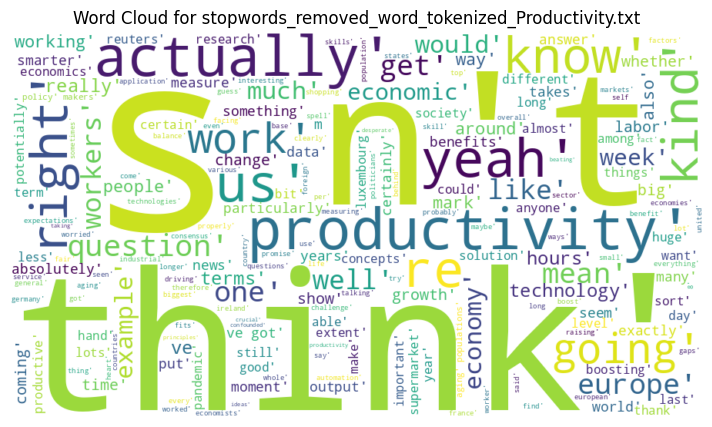

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


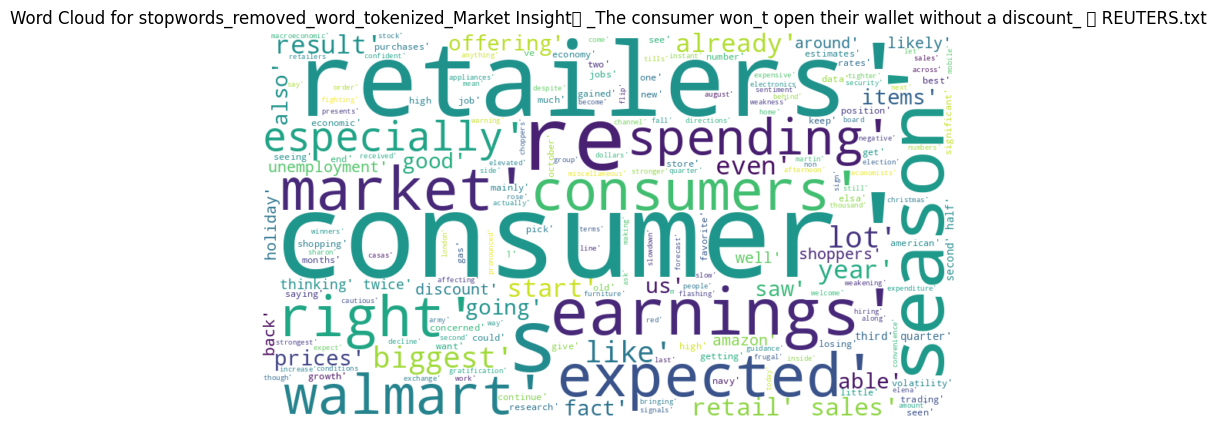

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65311 (\N{FULLWIDTH QUESTION MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


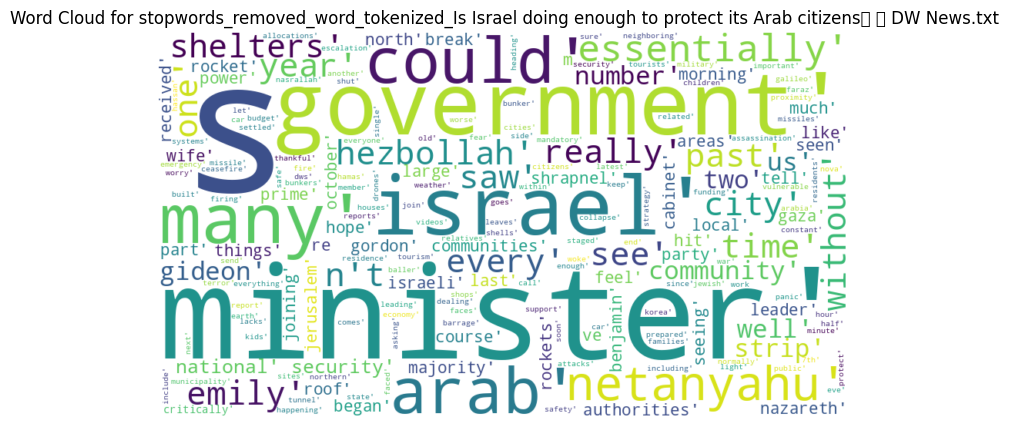

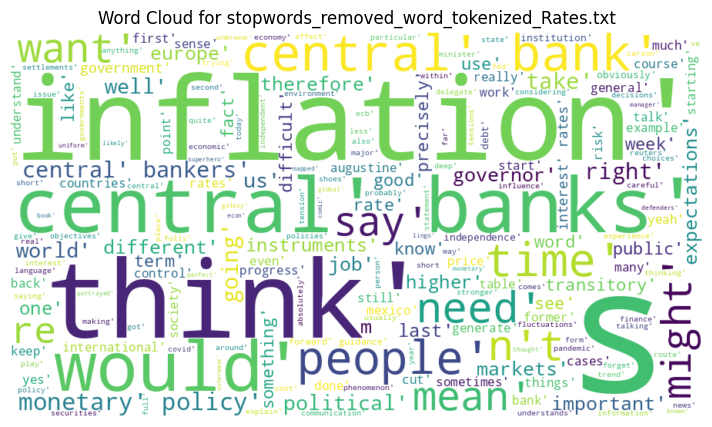

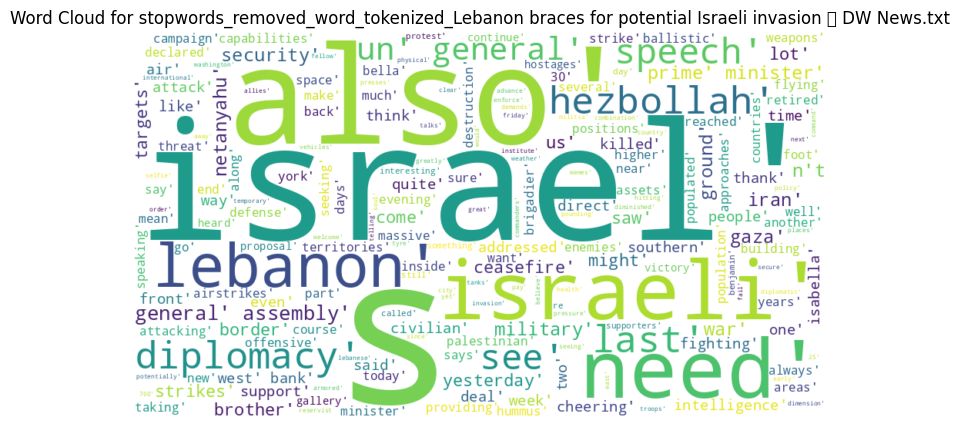

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
path = '/content/drive/MyDrive/NLP project/stopwords_removed/'
all_files = [f for f in os.listdir(path) if f.endswith('.txt')]
for filename in all_files[:5]:
    with open(os.path.join(path, filename), 'r') as file:
        article = file.read()
    wordcloud = WordCloud(width=900, height=500, background_color='white').generate(article)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {filename}')
    plt.axis('off')
    plt.show()

# lemmatization

In [36]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
input = '/content/drive/MyDrive/NLP project/stopwords_removed/'
lemmatized = '/content/drive/MyDrive/NLP project/lemmatized_texts/'
os.makedirs(lemmatized, exist_ok=True)
def lemmatizing(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]
for filename in os.listdir(input):
    if filename.endswith('.txt'):
        with open(os.path.join(input, filename), 'r') as file:
            tokens = eval(file.read())
            lemmatized_tokens = lemmatizing(tokens)
            lemmatized_filename = f'lemmatized_{filename}'
            with open(os.path.join(lemmatized, lemmatized_filename), 'w') as lemmatized_file:
                lemmatized_file.write(str(lemmatized_tokens))
print(f'Lemmatized files saved in: {lemmatized}')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized files saved in: /content/drive/MyDrive/NLP project/lemmatized_texts/


# POS tagging

In [41]:
import os
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
input_lemmatized_files = '/content/drive/MyDrive/NLP project/lemmatized_texts/'
output = '/content/drive/MyDrive/NLP project/pos_tagged_texts/'
os.makedirs(output, exist_ok=True)
def tagging(words):
    return nltk.pos_tag(words)
for filename in os.listdir(input_lemmatized_files):
    if filename.endswith('.txt'):
        with open(os.path.join(input_lemmatized_files, filename), 'r') as file:
            content = file.read().strip()
            x = word_tokenize(content)
            pos_tags = tagging(x)
            output_filename = f'pos_tagged_{filename}'
            with open(os.path.join(output, output_filename), 'w') as output_file:
                for word, tag in pos_tags:
                    output_file.write(f'{word}: {tag}\n')
print(f'POS-tagged files saved in: {output}')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


POS-tagged files saved in: /content/drive/MyDrive/NLP project/pos_tagged_texts/


# Average number of words and characters

In [42]:
dataset = '/content/drive/MyDrive/NLP project/entire_dataset/'
total_number_of_characters = 0
total_number_of_words = 0
count_of_file = 0

for filename in os.listdir(dataset):
    if filename.endswith('.txt'):
        with open(os.path.join(dataset, filename), 'r') as file:
            content = file.read()
            num_characters = len(content)
            num_words = len(content.split())
            total_number_of_characters += num_characters
            total_number_of_words += num_words
            count_of_file += 1
if count_of_file > 0:
    average_characters = total_number_of_characters / count_of_file
    average_words = total_number_of_words / count_of_file
    print(f'Average number of characters in {count_of_file} files: {average_characters:.2f}')
    print(f'Average number of words in {count_of_file} files: {average_words:.2f}')
else:
    print('No .txt files found in the directory.')

Average number of characters in 200 files: 8159.15
Average number of words in 200 files: 1424.88


# Text Representation
Classical methods


# Bag of Words (BoW)

In [43]:
import os
from sklearn.feature_extraction.text import CountVectorizer
input_files = '/content/drive/MyDrive/NLP project/entire_dataset/'
files = [f for f in os.listdir(input_files) if f.endswith('.txt')]
for filename in files:
    cleaned_filename = filename.replace("Copy of ", "")
    with open(os.path.join(input_files, filename), 'r') as file:
        content = file.read().lower()
    vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')
    X = vectorizer.fit_transform([content])
    vocabulary = vectorizer.vocabulary_
    format = ', '.join([f"{word}: {index}" for word, index in sorted(vocabulary.items())])
    print(f"Vocabulary of '{cleaned_filename}': {format}\n")

Vocabulary of 'Productivity.txt': a: 0, able: 1, about: 2, absolute: 3, absolutely: 4, accompany: 5, account: 6, accurate: 7, actual: 8, actually: 9, add: 10, addressed: 11, adjusted: 12, advanced: 13, afford: 14, again: 15, against: 16, age: 17, agenda: 18, aging: 19, ago: 20, ahead: 21, ai: 22, all: 23, almost: 24, alright: 25, also: 26, always: 27, america: 28, among: 29, amount: 30, an: 31, and: 32, anecdotally: 33, another: 34, answer: 35, any: 36, anyone: 37, apology: 38, application: 39, applied: 40, applies: 41, are: 42, around: 43, artificial: 44, as: 45, aspect: 46, assumed: 47, at: 48, attract: 49, automation: 50, available: 51, back: 52, balance: 53, banks: 54, barcode: 55, base: 56, basically: 57, bass: 58, be: 59, beating: 60, because: 61, becomes: 62, bed: 63, been: 64, before: 65, behind: 66, being: 67, below: 68, benefit: 69, benefits: 70, beside: 71, best: 72, beyond: 73, big: 74, biggest: 75, birth: 76, bit: 77, bluntly: 78, boils: 79, book: 80, booking: 81, boom: 82

In [44]:
import os
from sklearn.feature_extraction.text import CountVectorizer
input_files = '/content/drive/MyDrive/NLP project/entire_dataset/'
files = [f for f in os.listdir(input_files) if f.endswith('.txt')]
vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')
number_of_txt_files = []
for filename in files:
    with open(os.path.join(input_files, filename), 'r') as file:
        content = file.read().lower()
        number_of_txt_files.append(content)
X = vectorizer.fit_transform(number_of_txt_files)
count_of_number_of_txt_files = X.shape[0]
how_many_unique_words = X.shape[1]
print(f'Number of number of text files: {count_of_number_of_txt_files}')
print(f'Number of unique words: {how_many_unique_words}')

Number of number of text files: 200
Number of unique words: 12936


# TF-IDF

In [45]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
input_files = '/content/drive/MyDrive/NLP project/entire_dataset/'
files = [f for f in os.listdir(input_files) if f.endswith('.txt')]
txt_files = []
for filename in files:
    with open(os.path.join(input_files, filename), 'r') as file:
        content = file.read().lower()
        txt_files.append(content)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(txt_files)
transformer = TfidfTransformer()
matrix = transformer.fit_transform(X)
print("Shape of TF-IDF matrix:", matrix.shape)
for i, filename in enumerate(files):
    clean = filename.replace("Copy of ", "")
    tfidf_scores = matrix[i].toarray()[0]
    top_indices = tfidf_scores.argsort()[-10:][::-1]
    score_top10 = tfidf_scores[top_indices]
    words = vectorizer.get_feature_names_out()
    top_words = words[top_indices]
    print(f"\nTop 10 TF-IDF scores for document '{clean}':")
    for word, score in zip(top_words, score_top10):
        print(f"{word}: {score:.6f}")

Shape of TF-IDF matrix: (200, 13246)

Top 10 TF-IDF scores for document 'Productivity.txt':
the: 0.398899
productivity: 0.275209
of: 0.262609
and: 0.242664
to: 0.239340
that: 0.212746
it: 0.202774
is: 0.166208
you: 0.156236
in: 0.146263

Top 10 TF-IDF scores for document 'Market Insight： _The consumer won_t open their wallet without a discount_ ｜ REUTERS.txt':
the: 0.415950
retailers: 0.376503
consumer: 0.319261
is: 0.168791
and: 0.156735
that: 0.150707
earnings: 0.144704
walmart: 0.141479
to: 0.132622
of: 0.132622

Top 10 TF-IDF scores for document 'Is Israel doing enough to protect its Arab citizens？ ｜ DW News.txt':
the: 0.394350
of: 0.256786
to: 0.192590
arab: 0.183452
in: 0.174248
and: 0.165077
gideon: 0.154351
is: 0.137564
that: 0.128393
netanyahu: 0.124715

Top 10 TF-IDF scores for document 'Rates.txt':
the: 0.447399
central: 0.304131
to: 0.275840
inflation: 0.229873
that: 0.215290
banks: 0.198442
of: 0.174923
is: 0.171559
in: 0.154740
bank: 0.150957

Top 10 TF-IDF scores for doc